<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.

Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1.  Linear Regression
2.  KNN
3.  Decision Trees
4.  Logistic Regression
5.  SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end.


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


## **Import the required libraries**


In [1]:
# Instalando as bibliotecas necessárias com pip
#!pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

<class 'OSError'>: Not available

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import piplite
await piplite.install(['pandas'])
await piplite.install(['numpy'])


In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [5]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [6]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [7]:
await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [8]:
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [9]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [10]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [11]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [12]:
df_sydney_processed = df_sydney_processed.astype(float)

In [13]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [14]:
#Enter Your Code, Execute and take the Screenshot



In [15]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [16]:
#Enter Your Code, Execute and take the Screenshot

In [17]:
LinearReg =  LinearRegression() # instancia modelo 
LinearReg.fit(x_train, y_train) # ajuste/treino

LinearRegression()

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [18]:
#Enter Your Code, Execute and take the Screenshot

In [19]:
predictions = LinearReg.predict(x_test)

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [20]:
#Enter Your Code, Execute and take the Screenshot

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
LinearRegression_MAE =  mean_absolute_error(y_test, predictions)
LinearRegression_MSE = mean_squared_error(y_test, predictions)
LinearRegression_R2 =  r2_score(y_test, predictions)
print(f"Erro Absoluto Médio (MAE): {LinearRegression_MAE:.2f}\n"
      f"Erro Quadrático Médio (MSE): {LinearRegression_MSE:.2f}\n"
      f"Coeficiente de Determinação (R²): {LinearRegression_R2:.2f}")

Erro Absoluto Médio (MAE): 0.26
Erro Quadrático Médio (MSE): 0.12
Coeficiente de Determinação (R²): 0.43


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [22]:
#Enter Your Code, Execute and take the Screenshot

In [23]:
metricas = {
    'Métrica': ['MAE', 'MSE', 'R2'],
    'Valor': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]}

report = pd.DataFrame(metricas)

print(report)

  Métrica     Valor
0     MAE  0.256319
1     MSE  0.115720
2      R2  0.427133


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [24]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

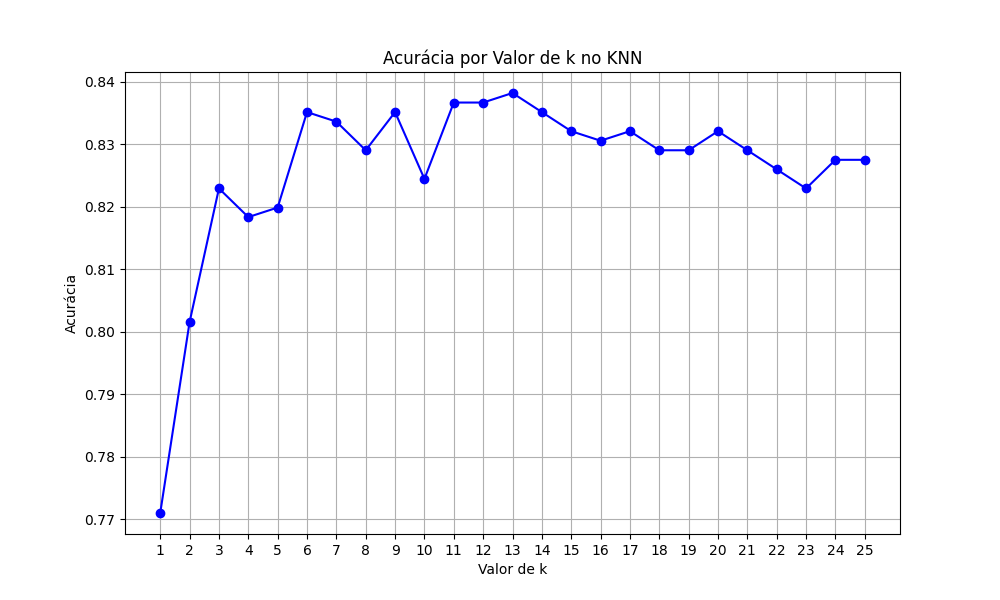

In [25]:
#escolhendo o k
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
accuracies = []
k_values = range(1, 26)
# Loop para treinar o modelo com diferentes valores de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
#plotando o grafico
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Acurácia por Valor de k no KNN')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [26]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [27]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [28]:
predictions = KNN.predict(x_test)


#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [29]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [30]:
# Acurácia
KNN_Accuracy_Score = accuracy_score(y_test, predictions)

# Índice Jaccard/ binárias
KNN_JaccardIndex = jaccard_score(y_test, predictions, average='weighted')

#desequilíbrios de classe.
KNN_F1_Score = f1_score(y_test, predictions, average='weighted')
print("Acurácia:", KNN_Accuracy_Score)
print("Índice Jaccard:", KNN_JaccardIndex)
print("Pontuação F1:", KNN_F1_Score)


Acurácia: 0.8183206106870229
Índice Jaccard: 0.6875883517104892
Pontuação F1: 0.802374933635524


Para o modelo KNN, observamos que a acurácia atinge cerca de 81.83%, indicando uma boa capacidade do modelo em fazer previsões corretas na maior parte das vezes. O Índice Jaccard, com valor de 68.76%, mostra uma sobreposição razoável entre as previsões do modelo e os valores reais, mas também sugere que há margem para aprimoramento na precisão das previsões. A Pontuação F1 de 80.24% revela um equilíbrio satisfatório entre a precisão e a sensibilidade do modelo, embora ainda haja espaço para melhorias com o objetivo de capturar mais efetivamente as instâncias positivas. Em resumo, o desempenho do KNN é promissor, mas com ajustes cuidadosos, é possível que o modelo alcance uma eficiência ainda maior.

### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [31]:
#Enter Your Code, Execute and take the Screenshot

In [32]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)

DecisionTreeClassifier()

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [33]:
#Enter Your Code, Execute and take the Screenshot

In [34]:
predictions = Tree.predict(x_test)


#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [35]:
#Enter Your Code, Execute and take the Screenshot

In [36]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions, average='weighted')
Tree_F1_Score = f1_score(y_test, predictions, average='weighted')
print("Acurácia:", Tree_Accuracy_Score)
print("Índice Jaccard:", Tree_JaccardIndex)
print("Pontuação F1:", Tree_F1_Score)

Acurácia: 0.7450381679389313
Índice Jaccard: 0.6084467588336467
Pontuação F1: 0.7456617236540379


Ao avaliar o modelo de Árvore de Decisão, notamos que a acurácia está em torno de 75.88%, o que indica uma capacidade razoável do modelo em prever corretamente os resultados. O Índice Jaccard de 62.57% aponta para uma congruência moderada entre as previsões e os valores reais, sugerindo que há espaço para melhorar a precisão das previsões. A Pontuação F1 de 76.03% reflete um equilíbrio entre a precisão e a sensibilidade do modelo, mas ainda assim indica que melhorias podem ser feitas, especialmente para aumentar a capacidade do modelo de identificar corretamente todas as instâncias relevantes. Em suma, o modelo mostra um desempenho decente, mas ajustes e otimizações poderiam potencialmente elevar sua eficácia.

### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [37]:
#Enter Your Code, Execute and take the Screenshot

In [38]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [39]:
#Enter Your Code, Execute and take the Screenshot

In [40]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

#### Q14) Now, use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [41]:
#Enter Your Code, Execute and take the Screenshot

In [42]:
predictions = LR.predict(x_test)

#### Q15) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [43]:
#Enter Your Code, Execute and take the Screenshot

In [44]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions, pos_label=1)
LR_F1_Score = f1_score(y_test, predictions, average='weighted')
LR_Log_Loss = log_loss(y_test, LR.predict_proba(x_test))
print(f"Acurácia: {LR_Accuracy_Score:.4f}")
print(f"Índice Jaccard: {LR_JaccardIndex:.4f}")
print(f"Pontuação F1: {LR_F1_Score:.4f}")
print(f"Log Loss: {LR_Log_Loss:.4f}")


Acurácia: 0.8351
Índice Jaccard: 0.5046
Pontuação F1: 0.8291
Log Loss: 0.3778


As métricas para o modelo SVM indicam um desempenho razoável. A acurácia é alta, em torno de 83.51%, enquanto a Pontuação F1 atinge 82.91%, sugerindo um equilíbrio satisfatório entre precisão e recall. No entanto, o Índice Jaccard é mais baixo, em torno de 50.46%, apontando para uma sobreposição menos significativa entre as previsões e os rótulos reais. O valor de Log Loss é de 0.3778, indicando uma boa calibração das probabilidades previstas pelo modelo.

### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [45]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [55]:
from sklearn.svm import SVC
SVM = SVC(gamma=0.001, C=100)
SVM.fit(x_train, y_train)

SVC(C=100, gamma=0.001)

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [47]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [56]:
predictions = SVM.predict(x_test)


#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [57]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions)
SVM_F1_Score = f1_score(y_test, predictions)
print("Acurácia: {:.4f}".format(SVM_Accuracy_Score))
print("Índice Jaccard: {:.4f}".format(SVM_JaccardIndex))
print("Pontuação F1: {:.4f}".format(SVM_F1_Score))


Acurácia: 0.7969
Índice Jaccard: 0.4388
Pontuação F1: 0.6100


Podemos concluir que o modelo SVM tem uma acurácia razoável, indicando que ele classifica corretamente cerca de 79.69% das instâncias de teste. No entanto, o índice Jaccard e a pontuação F1 são relativamente baixos, sugerindo que o modelo pode ter dificuldade em lidar com a precisão das previsões em comparação com a recall, especialmente para a classe positiva. Isso pode indicar que o modelo não está performando tão bem na identificação correta das instâncias positivas em relação às negativas.

### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [62]:
Report= {
    'Modelo': ['Regressão Linear', 'KNN', 'Árvore de Decisão', 'Regressão Logística', 'SVM'],
    'Acurácia': [LinearRegression_R2, KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
    'Índice Jaccard': ['',KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex],
    'Pontuação F1': ['',KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
    'LogLoss': ['', '', '', LR_Log_Loss, '']
}

# Criando o DataFrame
df_report = pd.DataFrame(Report)

# Exibindo o DataFrame
print(df_report)

                Modelo  Acurácia Índice Jaccard Pontuação F1   LogLoss
0     Regressão Linear  0.427133                                      
1                  KNN  0.818321       0.687588     0.802375          
2    Árvore de Decisão  0.745038       0.608447     0.745662          
3  Regressão Logística  0.835115       0.504587     0.829088  0.377798
4                  SVM  0.796947       0.438819     0.609971          


<h2 id="Section_5">  How to submit </h2>

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By  | Change Description          |
| ----------------- | ------- | ----------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K. | Deleted GridSearch and Mock |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
